In [105]:
%matplotlib inline

import colour
import numpy as np
import pprint
import cv2
import glob
import matplotlib.pyplot as plt
import os
from collections import OrderedDict
import PIL
import pylab
import subprocess

from colour_checker_detection import (
    EXAMPLES_RESOURCES_DIRECTORY,
    colour_checkers_coordinates_segmentation,
    detect_colour_checkers_segmentation)
from colour_checker_detection.detection.segmentation import (
    adjust_image)

In [106]:
colour.plotting.colour_style()

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.8.8 | packaged by conda-forge | (default, Feb 20 2021,     *
*   16:12:38)                                                                 *
*                [Clang 11.0.1 ]                                              *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.3.16                                                       *
*       colour-checker-detection : 0.1.2                                      *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.9.0                                                       *
*       matplotlib : 3.4.2              

None (4924, 7378) RGBA


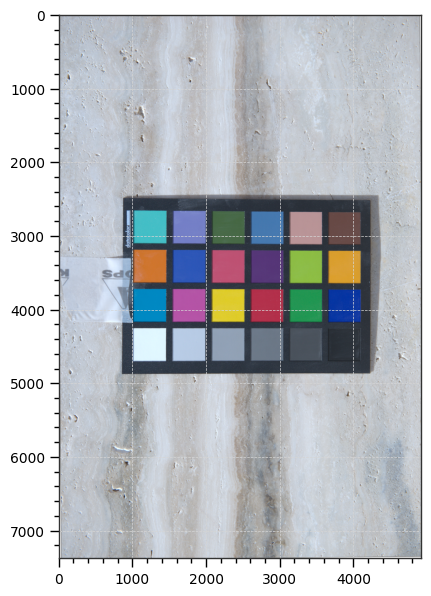

In [107]:
img = PIL.Image.open("chart_corrected.png").rotate(0.5)
print(img.format, img.size, img.mode)
plt.imshow(np.asarray(img))

None (3170, 2150) RGBA


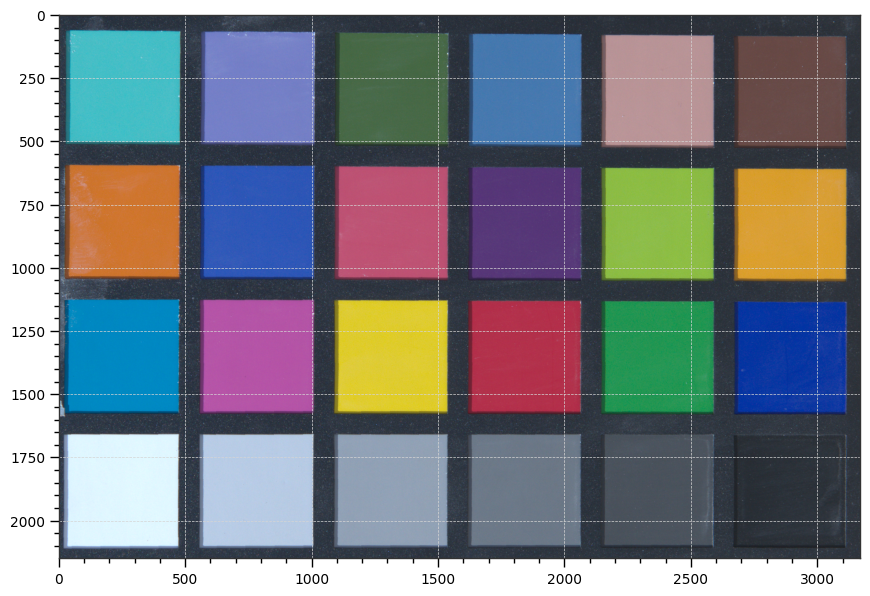

In [108]:
area = (980,2600,4150,4750)
img_cropped = img.crop(area)
print(img_cropped.format, img_cropped.size, img_cropped.mode)
plt.imshow(np.asarray(img_cropped))
img_cropped.save("chart_cropped.png")

In [109]:
chart_image = colour.read_image("chart_cropped.png")
#colour_checkers_coordinates_segmentation(chart_image) 
detect_colour_checkers_segmentation(chart_image)

/Users/francesco.anselmo/anaconda3/envs/py38/lib/python3.8/site-packages/colour/utilities/verbose.py:237: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


[]

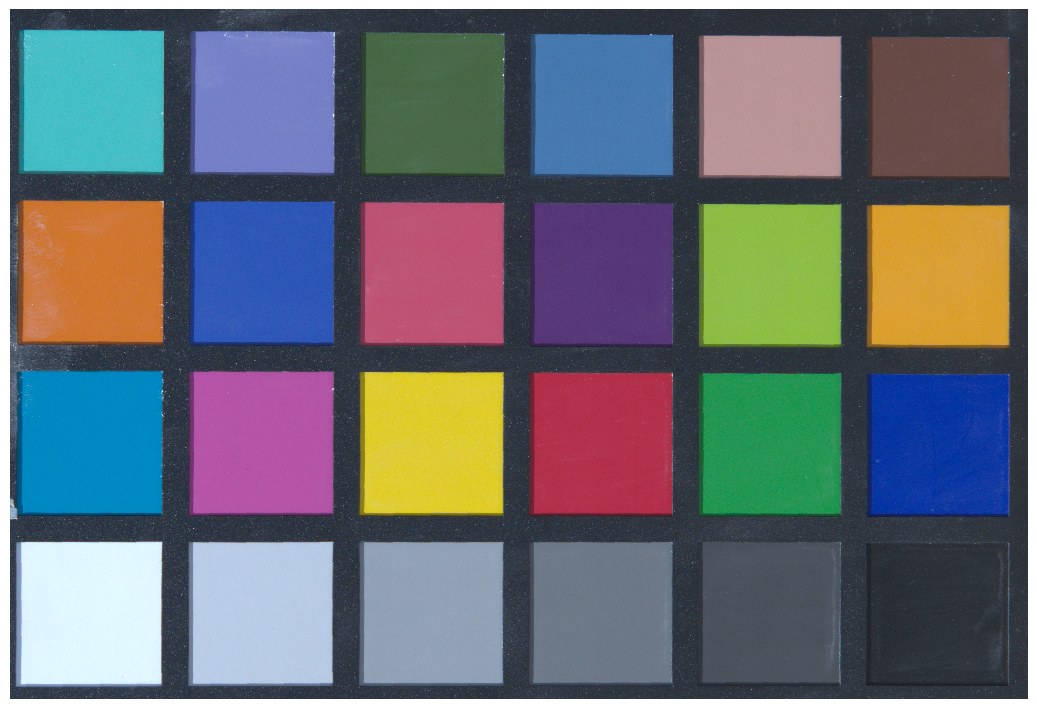

(<Figure size 1280x720 with 1 Axes>, <AxesSubplot:>)

In [110]:
#chart_image_cctf = colour.cctf_decoding(colour.read_image(chart_image))
colour.plotting.plot_image(chart_image)

In [111]:
detect_colour_checkers_segmentation(chart_image, additional_data=True)

[]

In [113]:
cmd = "profcheck -v2 -k chart.ti3 chart.icc"
sp = subprocess.run(cmd.split(" "), capture_output=True)
#print(str(sp.stdout).split("\\n"))
patches_values = []
patches_cieLab = []
reference_cieLab = []
patches_labels = []
patches_labels_deltaE = []
for l in str(sp.stdout).split("\\n")[1:-2]:
    patches_values.append(l.split(" "))
    patches_cieLab.append(colour.utilities.as_float_array(l.split(" ")[6:9]))
    reference_cieLab.append(colour.utilities.as_float_array(l.split(" ")[11:14]))
    patches_labels.append(l.split(" ")[1][:-1])
    patches_labels_deltaE.append(l.split(" ")[1]+" dE="+l.split(" ")[0])
    #print(l.split(" "))

patches_cieLab = colour.utilities.as_float_array(patches_cieLab)
# pp.pprint(patches_cieLab)
reference_cieLab = colour.utilities.as_float_array(reference_cieLab)
# pp.pprint(patches_labels_deltaE)

In [114]:
reorder = [3, 7, 11, 15, 19, 23, 2, 6, 10, 14, 18, 22, 1, 5, 9, 13, 17, 21, 0, 4, 8, 12, 16, 20]

patches_cieLab_reordered = []
reference_cieLab_reordered = []
patches_labels_reordered = []
patches_labels_deltaE_reordered = []

for i in range(len(patches_cieLab)):
    patches_cieLab_reordered.append(patches_cieLab[reorder[i]])
    reference_cieLab_reordered.append(reference_cieLab[reorder[i]])
    patches_labels_reordered.append(patches_labels[reorder[i]])
    patches_labels_deltaE_reordered.append(patches_labels_deltaE[reorder[i]])

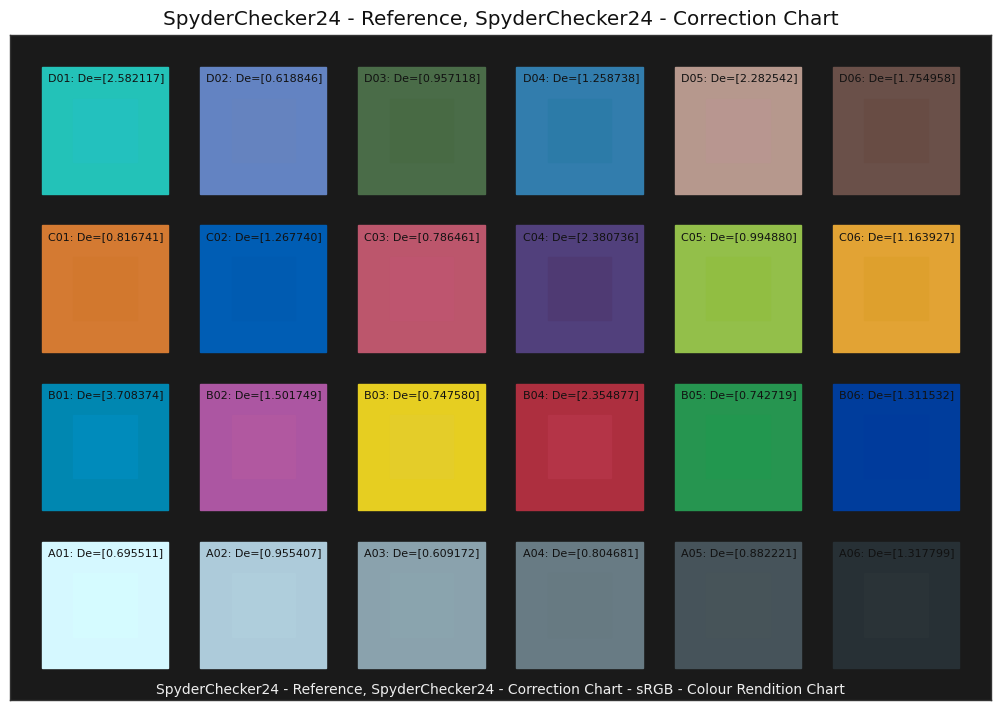

(<Figure size 1280x720 with 1 Axes>,
 <AxesSubplot:title={'center':'SpyderChecker24 - Reference, SpyderChecker24 - Correction Chart'}>)

In [116]:
pp = pprint.PrettyPrinter(indent=4, width=41, depth=1)
# for k in colour.CCS_COLOURCHECKERS.keys():
#     pp.pprint(k)

colour_checker_reference = colour.CCS_COLOURCHECKERS['ColorChecker 1976']

xyY_reference = colour.utilities.as_float_array(
    colour_checker_reference.data.values())

patches_xyY = colour.utilities.as_float_array([colour.XYZ_to_xyY(colour.Lab_to_XYZ(patch)) for patch in patches_cieLab_reordered])
reference_xyY = colour.utilities.as_float_array([colour.XYZ_to_xyY(colour.Lab_to_XYZ(patch)) for patch in reference_cieLab_reordered])

#Lab_to_XYZ
#XYZ_to_xyY

#pp.pprint(xyY_reference)
#pp.pprint(patches_xyY)
#pp.pprint(reference_xyY)
#pp.pprint(colour_checker_reference.data.keys())

colour_checker_spyder24 = colour.characterisation.ColourChecker(
    'SpyderChecker24 - Reference',
    dict(zip(*[list(patches_labels_deltaE_reordered), reference_xyY])),
    colour_checker_reference.illuminant)


colour_checker_test = colour.characterisation.ColourChecker(
    'SpyderChecker24 - Correction Chart',
    dict(zip(*[list(patches_labels_deltaE_reordered), patches_xyY])),
    colour_checker_reference.illuminant)

# patches_labels

colour.plotting.plot_multi_colour_checkers([colour_checker_spyder24, colour_checker_test])
# colour.plotting.plot_multi_colour_checkers([colour_checker_reference, colour_checker_test])